In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
df.shape

(801, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [6]:
df.is_legendary.value_counts()

is_legendary
0    731
1     70
Name: count, dtype: int64

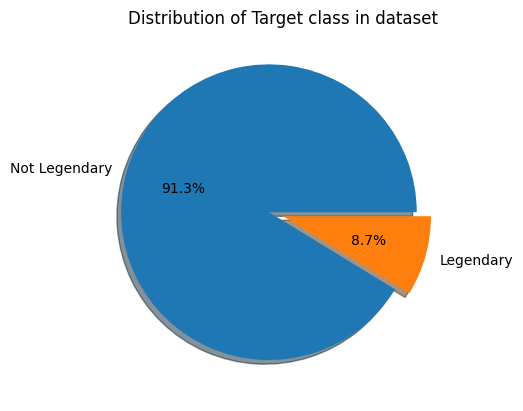

In [7]:
%matplotlib inline
plt.pie(x=df.is_legendary.value_counts(), autopct='%1.1f%%',
       labels=['Not Legendary', 'Legendary'], startangle=0, explode=[0.1, 0], shadow=True)
plt.title('Distribution of Target class in dataset')
plt.show()

In [8]:
#checking missing values
for col in df.columns:
    missing_percentage = df[col].isnull().sum() / len(df) * 100
    print(f"{col}:   {missing_percentage:.2f}%")

abilities:   0.00%
against_bug:   0.00%
against_dark:   0.00%
against_dragon:   0.00%
against_electric:   0.00%
against_fairy:   0.00%
against_fight:   0.00%
against_fire:   0.00%
against_flying:   0.00%
against_ghost:   0.00%
against_grass:   0.00%
against_ground:   0.00%
against_ice:   0.00%
against_normal:   0.00%
against_poison:   0.00%
against_psychic:   0.00%
against_rock:   0.00%
against_steel:   0.00%
against_water:   0.00%
attack:   0.00%
base_egg_steps:   0.00%
base_happiness:   0.00%
base_total:   0.00%
capture_rate:   0.00%
classfication:   0.00%
defense:   0.00%
experience_growth:   0.00%
height_m:   2.50%
hp:   0.00%
japanese_name:   0.00%
name:   0.00%
percentage_male:   12.23%
pokedex_number:   0.00%
sp_attack:   0.00%
sp_defense:   0.00%
speed:   0.00%
type1:   0.00%
type2:   47.94%
weight_kg:   2.50%
generation:   0.00%
is_legendary:   0.00%


- we can see that type2 attriburte has almost 48% data ***missing/Nan*** so we have to do something about it 

In [9]:
df.type2.value_counts()

type2
flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: count, dtype: int64

- looks like most of the class are flying class but instead of just fitting the data with mode we will check the frequency distribution of the type2 attribute and impute new values accordingly.

In [10]:
value_counts = df['type2'].value_counts()
probabilities = value_counts/value_counts.sum()

In [11]:
def impute_with_probabilities(series, probabilities):
    missing_indices = series[series.isnull()].index
    imputed_values = np.random.choice(probabilities.index,
                                      size=len(missing_indices), 
                                      p=probabilities.values)
    series.loc[missing_indices] = imputed_values
    return series

In [12]:
df2 = df.copy()

In [13]:
df2['type2'] = impute_with_probabilities(df2.type2, probabilities)  # imputing according to the frquency distribution of the data

In [14]:
df2.duplicated().sum()

0

- we still have some missing values in 'weight_kg','height_m','percentage_male' these columns but these are numerical features so we will impute these values using median.

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [16]:
missing_cols = ['weight_kg','height_m','percentage_male']
df2[missing_cols] = imputer.fit_transform(df2[missing_cols])

In [17]:
df2.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

- **now our data is cleaned the next thing is to do is ***train test split*** so that we are not exposed to our test data**

- we can see that the split in our train and test set is equal to the original dataset this prevents sampling bias 

# EDA 

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [19]:
stats_attributes = ['hp', 'speed', 'attack', 'defense']

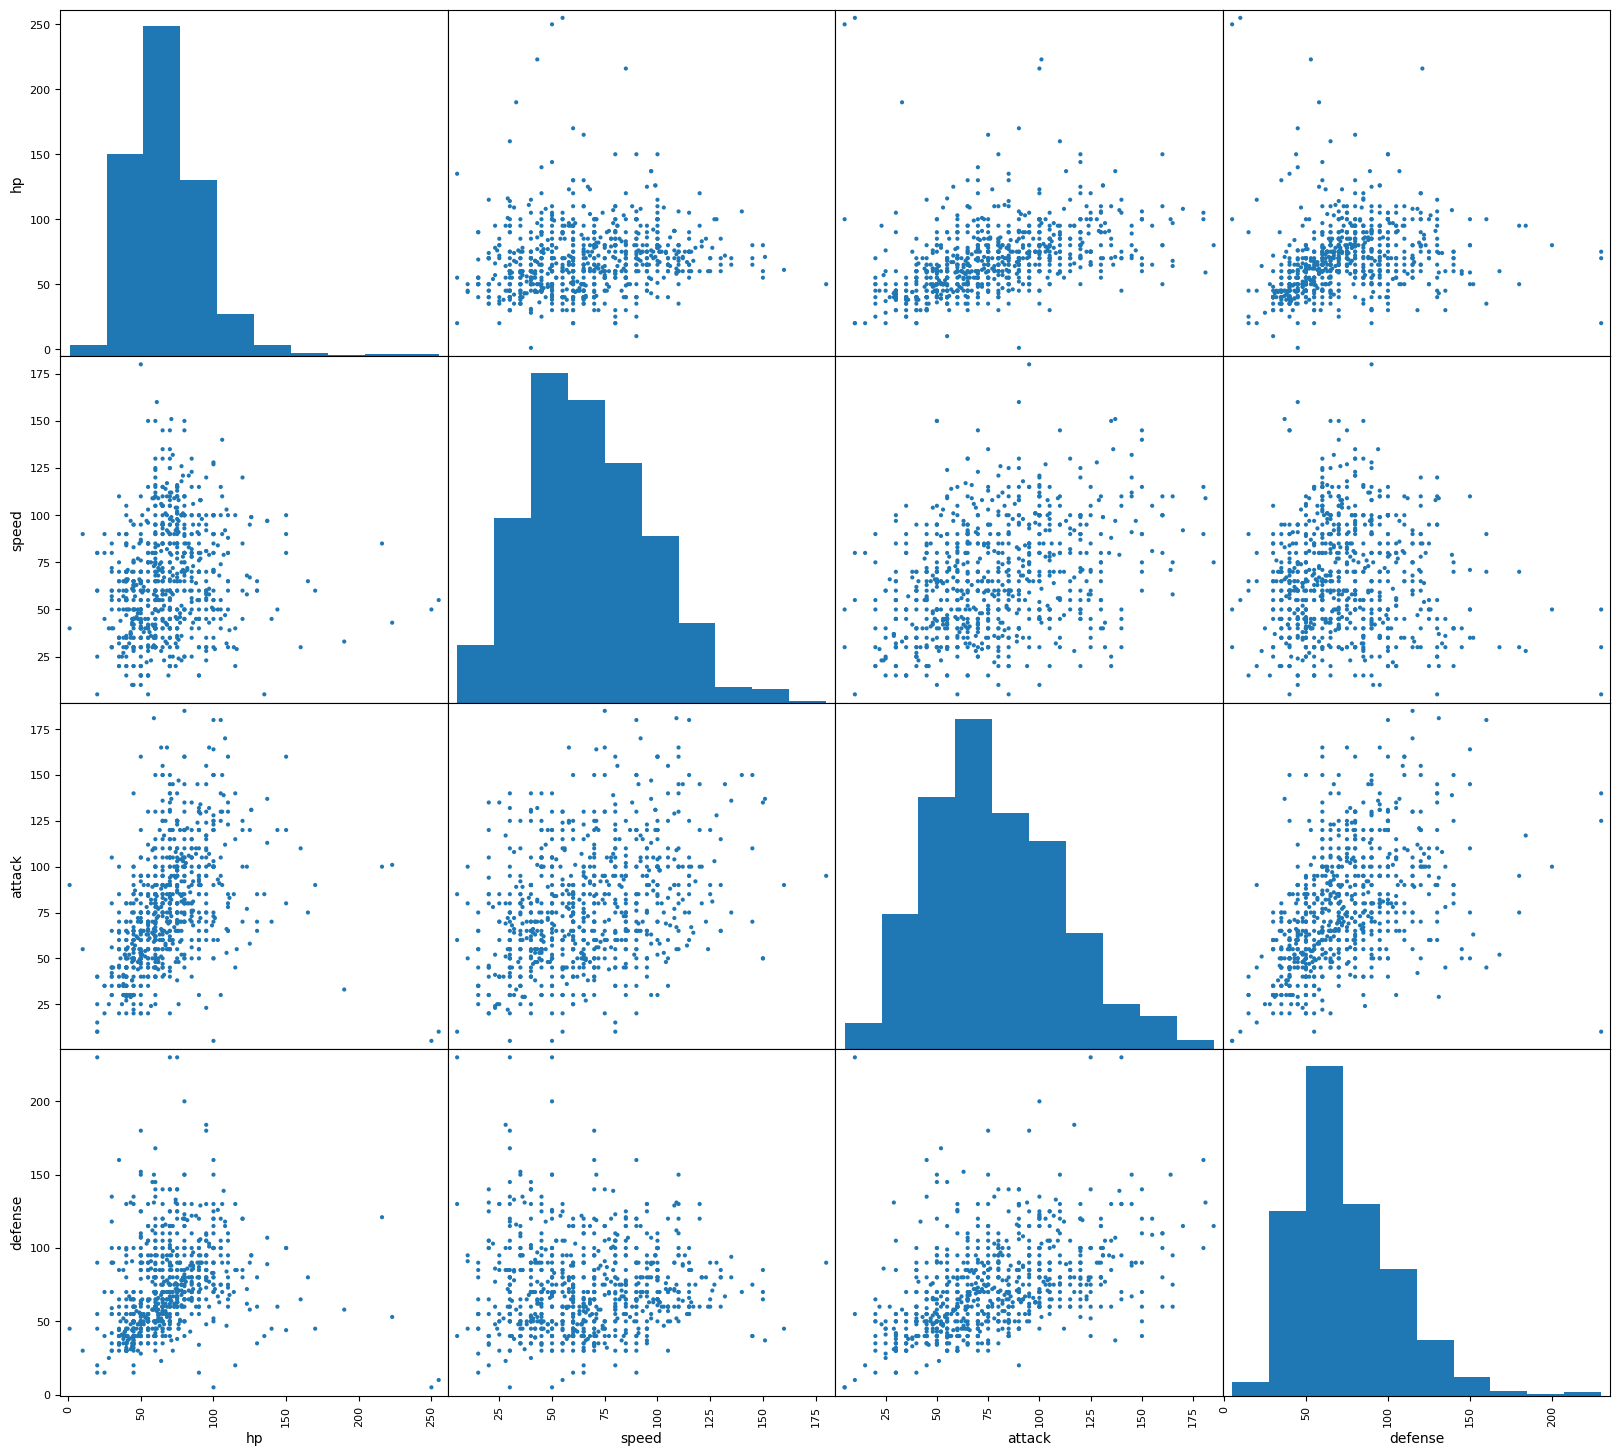

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(df2[stats_attributes], figsize=(20,18), alpha=1)
plt.show()

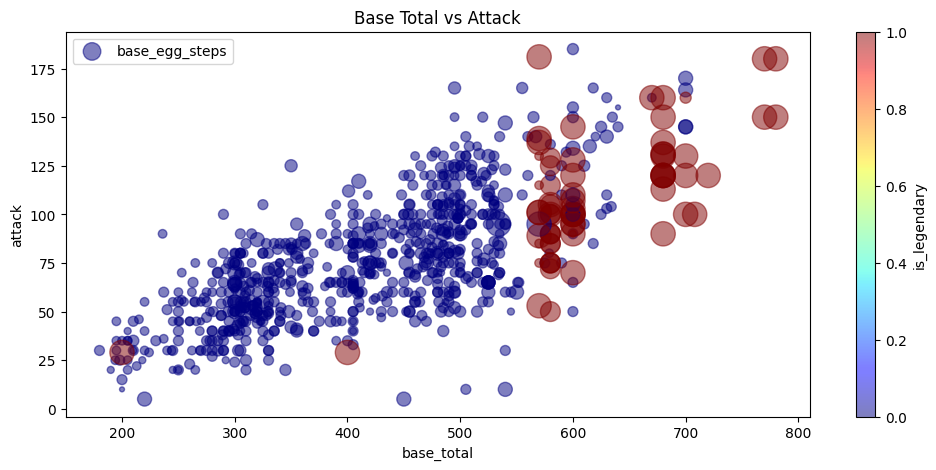

In [21]:
df2.plot(kind='scatter', x='base_total', y='attack',alpha=0.5,
        s=df2['base_egg_steps']/100, label='base_egg_steps', figsize=(12,5),
        c='is_legendary', cmap=plt.get_cmap('jet'), colorbar=True,)
plt.title('Base Total vs Attack')
plt.show()

**OBSERVATIONS**
- ***Legendary Pokémon*** (redder bubbles) generally have high `base_total` values, often above 600.
- They also tend to have high attack stats.
- `base_egg_steps` for ***Legendary Pokémon*** are way higher than of ***non-Legendary Pokémon***
- The plot also shows distinct groupings, especially around the `base_total` values of 300,500,600 and 700.

In [22]:
attrs = ['hp', 'speed', 'attack', 'defense','base_total', 'is_legendary']

<Figure size 2000x1500 with 0 Axes>

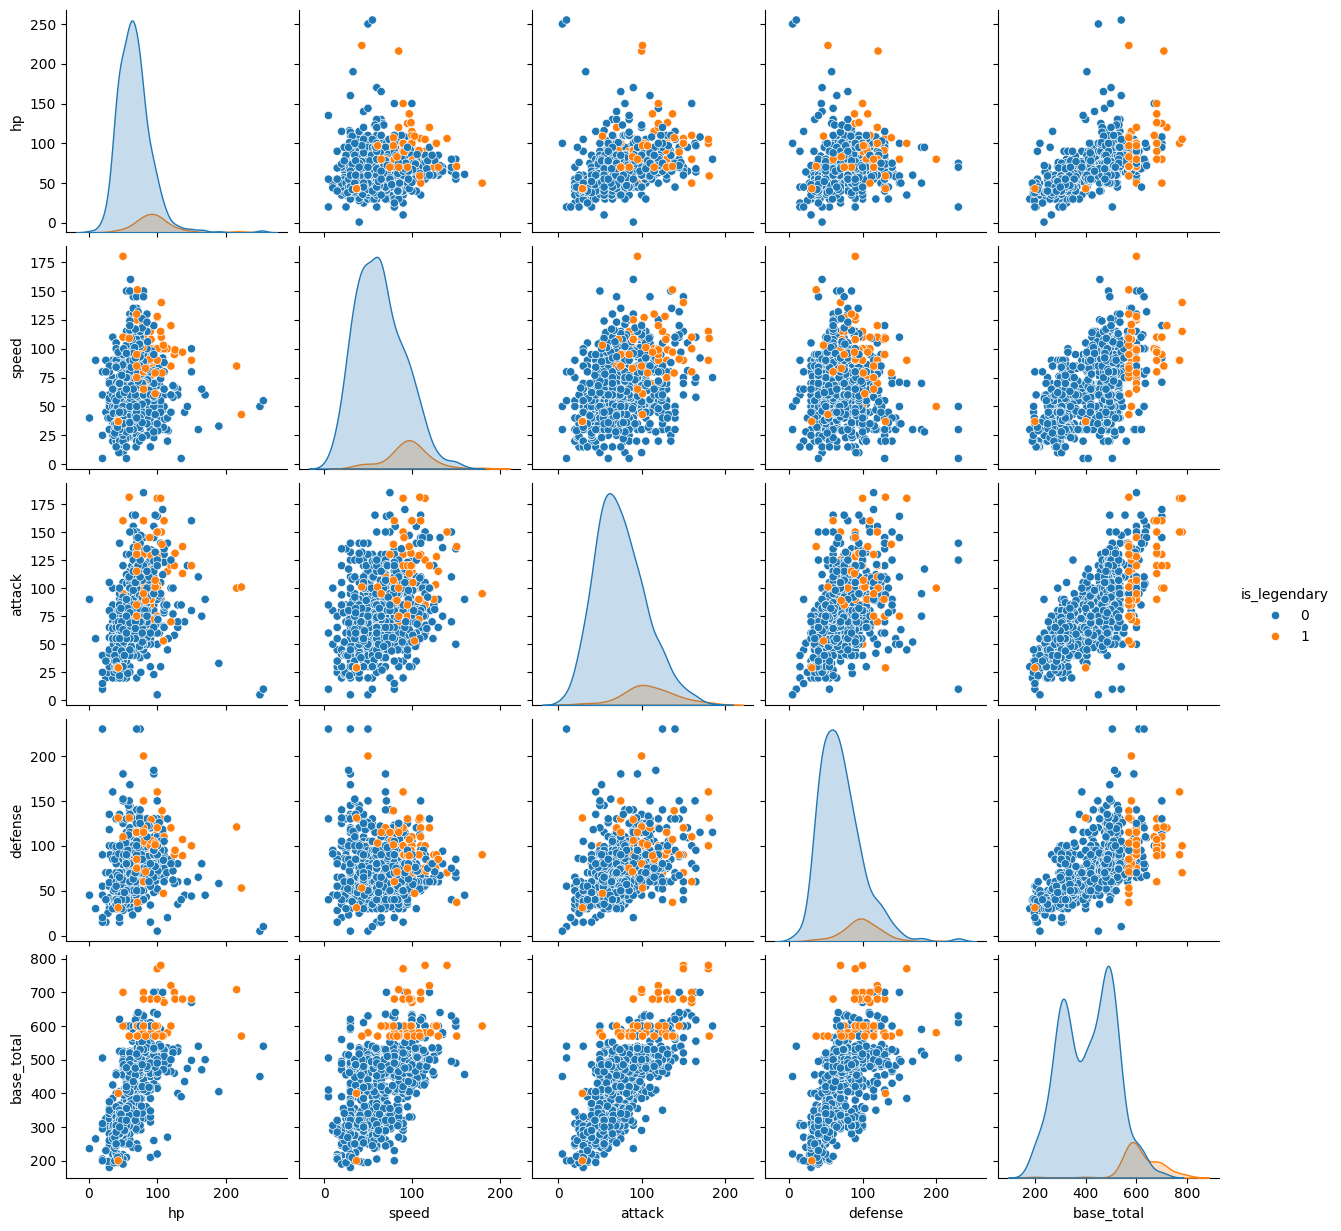

In [23]:
plt.figure(figsize=(20,15))
sns.pairplot(data=df2[attrs], hue='is_legendary')
plt.show()

In [24]:
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns

In [25]:
categorical_cols

Index(['abilities', 'capture_rate', 'classfication', 'japanese_name', 'name',
       'type1', 'type2'],
      dtype='object')

In [26]:
# It shows that capture rate is a categorical column but it should be numerical 
df.capture_rate.value_counts()

capture_rate
45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
50                            7
150                           7
235                           7
100                           6
140                           6
127                           5
70                            4
65                            3
125                           3
55                            3
170                           2
130                           2
15                            2
220                           2
80                            2
205                           1
155                           1
145                        

In [27]:
# lets change the value of 30 (Meteorite)255 (Core) to just 30 which we verified from Pokemon database 
df2['capture_rate'] = df2['capture_rate'].replace('30 (Meteorite)255 (Core)', '30')

In [28]:
df2['capture_rate'] = df2['capture_rate'].astype(int)

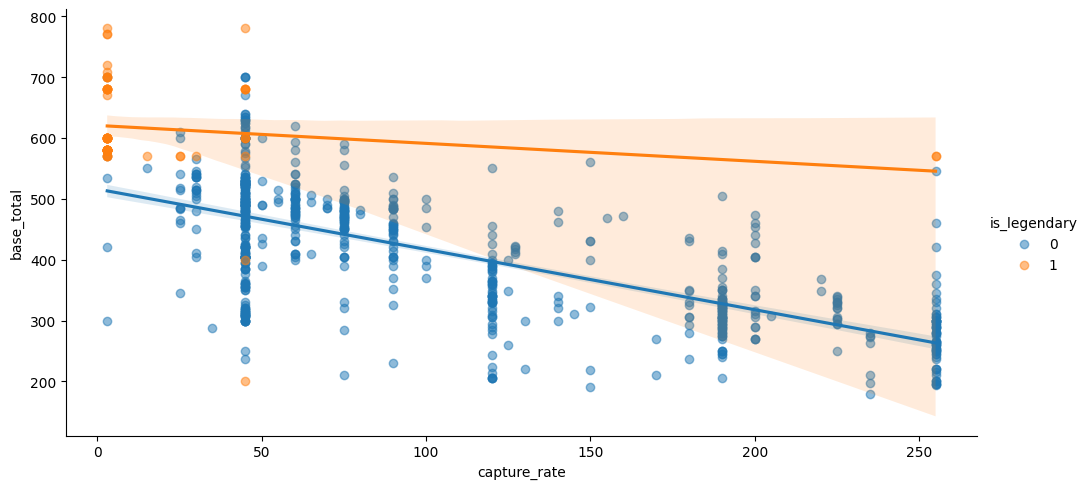

In [29]:
sns.lmplot(x='capture_rate', y='base_total', hue='is_legendary',data=df2, aspect=2, scatter_kws={'alpha':0.5})
plt.show()

**OBSERVATIONS**
- There is a negative correlation between `capture_rate` and `base_total` for ***non-legendary Pokémon***, as indicated by the downward slope of the blue trend line. This suggests that as the `capture_rate` increases, the `base_total` tends to decrease for non-legendary Pokémon.
  
- The orange trend line for ***legendary Pokémon*** is relatively flat, indicating a weak or no correlation between `capture_rate` and `base_total` for legendary Pokémon. This suggests that the `base_total` of legendary Pokémon does not significantly change with `capture_rate`.
  
- Non-legendary Pokémon are more widely distributed across different `capture_rate` values, while legendary Pokémon are clustered in specific capture_rate ranges (mostly lower values).
  
- Legendary Pokémon generally have higher `base_total` values compared to non-legendary Pokémon, as seen by the higher position of the orange points and line.

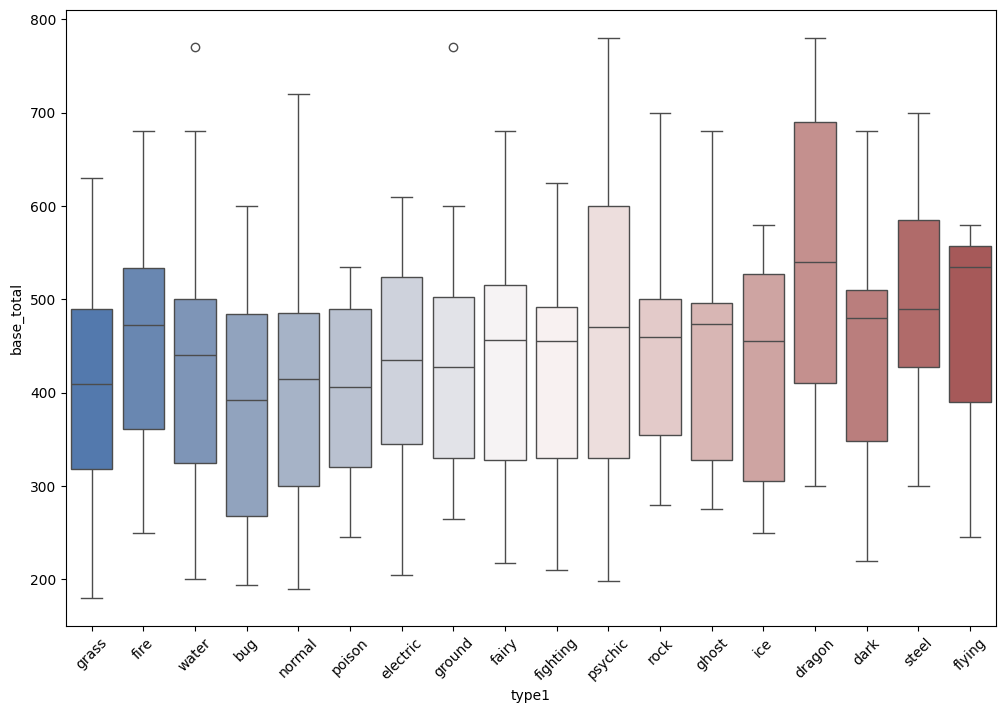

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='type1', y='base_total',data=df2,whis=1.5, palette='vlag')
plt.xticks(rotation=45)
plt.show()

**OBSERVATIONS**
- Dragon type Pokémon have the highest median `base_total`, they also have significant range indicating overall exceptionally strong Pokémon.
- Steel, Pyschic and Fire type are in close comparison with each other but Psychih types have higher range showing some strong Pokémons as well.
- Types like Bug and Normal have lower median `base_total` values, indicating generally weaker Pokémon in these categories.

# PEARSON CORRELATION

In [31]:
# checking correlatin for against_ columns 
substring = 'against'
against_cols = [s for s in numerical_cols if substring in s]
against_df = df2[against_cols]

In [32]:
against_df = pd.concat([against_df, df2['is_legendary']], axis=1)

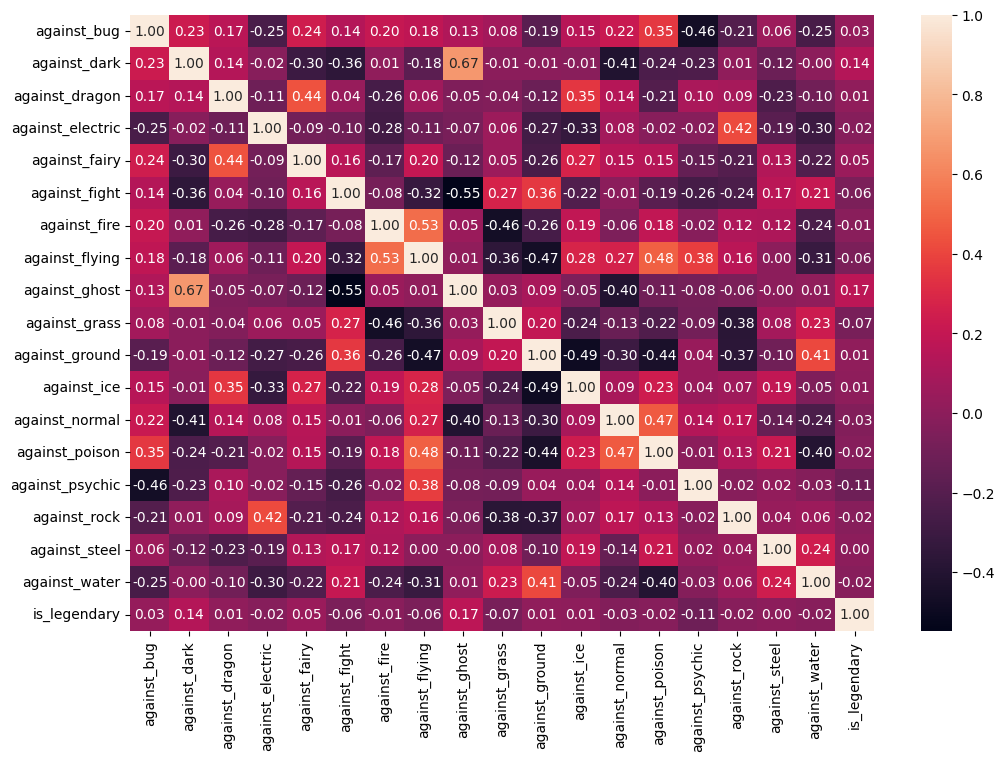

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(against_df.corr(), annot=True, fmt='.2f')
plt.show()

- The correlation show little to none correlation between `against_%` and `is_legendary` column to avoid high Dimensionality we will avoid these columns for now.

In [34]:
substring = 'against'
not_against_cols = [s for s in numerical_cols if substring not in s]
not_against_df = df2[not_against_cols]

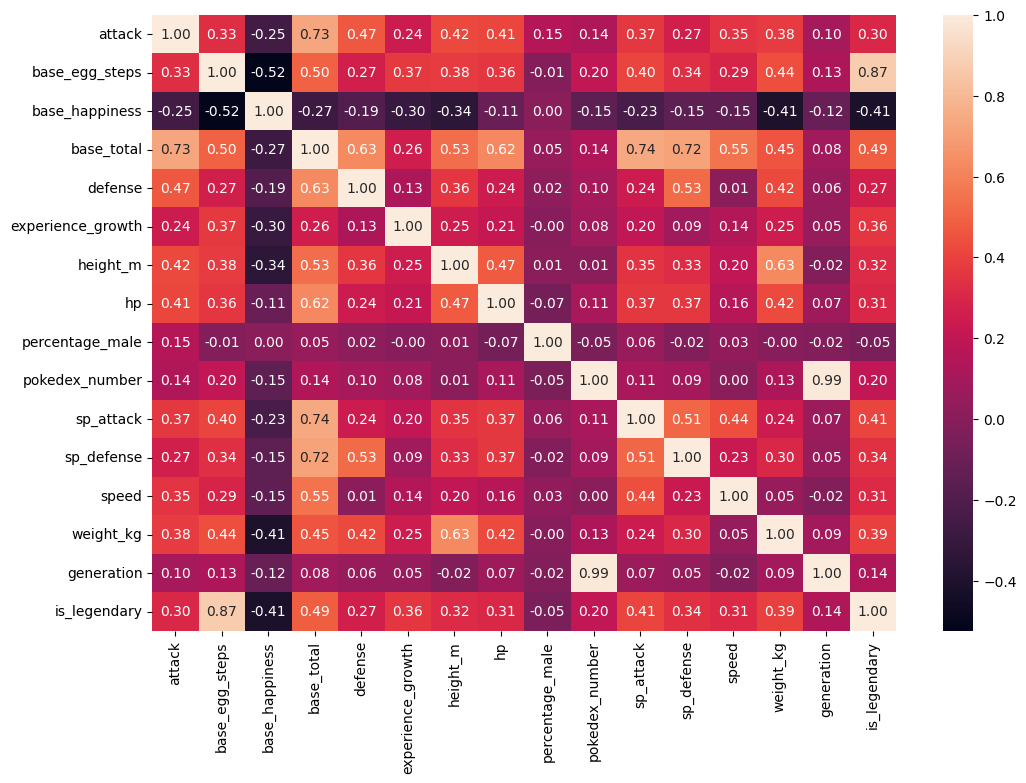

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(not_against_df.corr(), annot=True, fmt='.2f')
plt.show()

- we can see that these columns has better correlatin with our target attribute 

In [36]:
categorical_features = df2.select_dtypes(include='object').columns

In [37]:
df2 = df2.drop(df[categorical_features], axis=1)

In [38]:
df2 = df2.drop(df[against_cols], axis=1)

In [39]:
df2.shape

(801, 17)

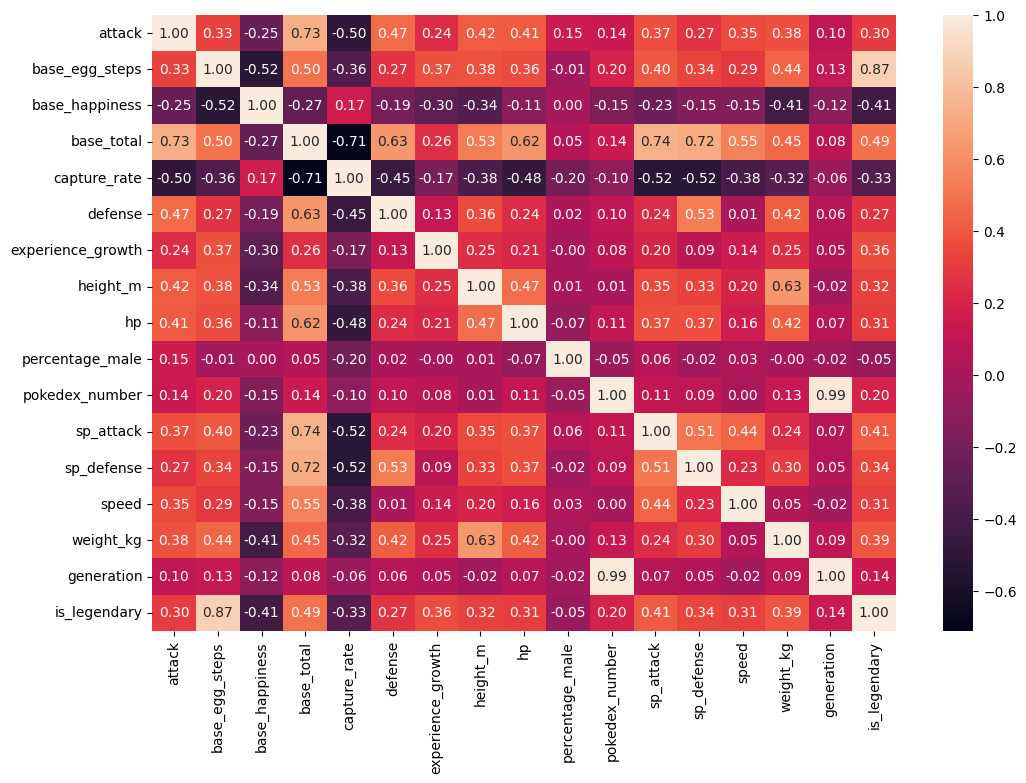

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True, fmt='.2f')
plt.show()

# Train Test Split

In [41]:
X = df2.iloc[:,:-1]
Y = df2.is_legendary

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Training Supervised Learning Algorithms

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

rf = RandomForestClassifier()
logit = LogisticRegression()
dt = DecisionTreeClassifier()

In [44]:
rf.fit(X_train, y_train)
logit.fit(X_train, y_train)
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
y_rf= rf.predict(X_test)
y_logit= logit.predict(X_test)
y_df= dt.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [56]:
print('random_forest: ', accuracy_score(y_test, y_rf)*100)
print('logitstic_regression: ',accuracy_score(y_test, y_logit)*100)
print('decision_tree: ',accuracy_score(y_test, y_df)*100)

random_forest:  100.0
logitstic_regression:  98.13664596273291
decision_tree:  100.0


In [48]:
print(confusion_matrix(y_test, y_rf))
print(confusion_matrix(y_test, y_logit))
print(confusion_matrix(y_test, y_df))

[[143   0]
 [  0  18]]
[[143   0]
 [  3  15]]
[[143   0]
 [  0  18]]


In [60]:
some_data = df.iloc[:10]
some_labels = df.is_legendary[:10]

In [61]:
some_data = some_data[['attack', 'base_egg_steps', 'base_happiness', 'base_total',
       'capture_rate', 'defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense', 'speed',
       'weight_kg', 'generation']]

In [62]:
some_labels

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: is_legendary, dtype: int64

In [63]:
y_pred = rf.predict(some_data)

In [64]:
accuracy_score(some_labels, y_pred)

1.0

In [65]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [57]:
model = rf

In [58]:
from sklearn.model_selection import cross_val_score, KFold

In [66]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, some_data, some_labels, cv=kf, scoring='accuracy')

In [70]:
scores*100

array([100., 100., 100., 100., 100.])